In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;
!head -4 data/Person_Gender_Height_Weight_Index.csv

head: data/Person_Gender_Height_Weight_Index.csv: No such file or directory


Ho importato le librerie e guardato come è fatto il dataset che userò

In [3]:
data = pd.read_csv('../data/Person_Gender_Height_Weight_Index.csv')
peso_alt = pd.DataFrame(data, columns=['Gender', 'Height', 'Weight'])
print(peso_alt)

     Gender  Height  Weight
0      Male     174      96
1      Male     189      87
2    Female     185     110
3    Female     195     104
4      Male     149      61
..      ...     ...     ...
495  Female     150     153
496  Female     184     121
497  Female     141     136
498    Male     150      95
499    Male     173     131

[500 rows x 3 columns]


Ho letto il csv e definito il data frame con le colonne che mi servono

In [4]:
def BMI_calc(altezza, peso):
    BMI= peso//((altezza/100)**2)
    return BMI
peso_alt.insert(3, "BMI", BMI_calc(peso_alt.Height, peso_alt.Weight), True)
#forma alternativa: peso_alt['BMI']=peso_alt.Weight/(peso_alt.Height/100)**2)
peso_alt

,Gender,Height,Weight,BMI
0,Male,174,96,31.0
1,Male,189,87,24.0
2,Female,185,110,32.0
3,Female,195,104,27.0
4,Male,149,61,27.0
...,...,...,...,...
495,Female,150,153,68.0
496,Female,184,121,35.0
497,Female,141,136,68.0
498,Male,150,95,42.0


In [6]:
peso_alt.to_csv('../data/Es2plot_BMI.csv', columns=['Gender', 'Height', 'Weight','BMI'])
!head -4 ../data/Es2plot_BMI.csv

,Gender,Height,Weight,BMI
0,Male,174,96,31.0
1,Male,189,87,24.0
2,Female,185,110,32.0


Creiamo una funzione specifica per calcolare il BMI dato il peso e l'altezza. BMI si calcola facendo il peso (in kg.) diviso l'altezza (in m.) al quadrato. (BMI=peso (in kg.)/(altezza (in m.)**2).
Poi inseriamo una nuova colonna nel dataset che chiamiamo BMI con il risultato del calcolo.

In [7]:
peso_alt.to_csv('../data/Es2plot_BMI.csv')
!head -4 ../data/Es2plot_BMI.csv

,Gender,Height,Weight,BMI
0,Male,174,96,31.0
1,Male,189,87,24.0
2,Female,185,110,32.0


Salvo il dataset modificato con nuovo nome.
Ora usiamo delle funzioni di visualizzazione per produrre grafici di tipo diverso ed esercitarci con l'uso sia dei Jupyter notebook sia con funzioni Python (matplotlib, seaborn) che dovrebbero ricordare molto quelle già note di R (ggplot)

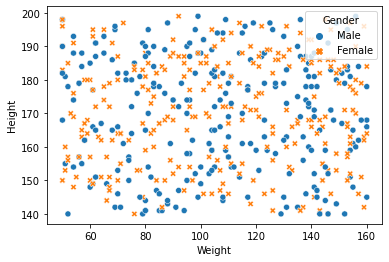

In [6]:
sns.scatterplot(data=peso_alt, x="Weight", y="Height", hue="Gender", style="Gender")
plt.show()

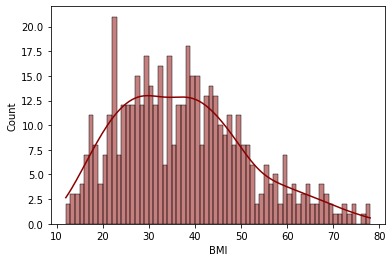

In [7]:
sns.histplot(data=peso_alt, x="BMI", binwidth=1, stat="count", color="darkred", kde="true")
plt.show()

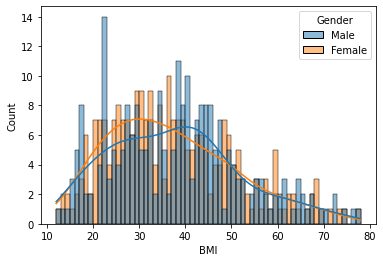

In [8]:
sns.histplot(data=peso_alt, x="BMI", binwidth=1, stat="count", hue="Gender", kde="true")
plt.show()

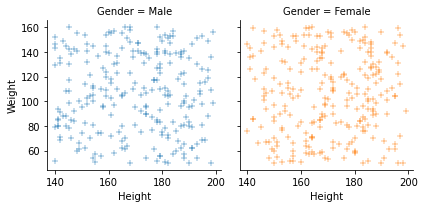

In [9]:
g = sns.FacetGrid(peso_alt, col="Gender", hue="Gender")
g.map(sns.scatterplot, "Height", "Weight", marker="+")

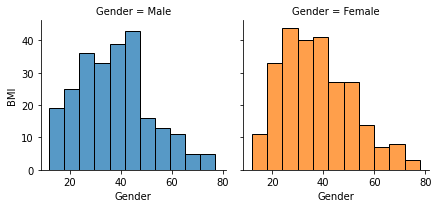

In [12]:
g = sns.FacetGrid(peso_alt, col="Gender", hue="Gender")
g.map(sns.histplot, "BMI")
g.set_axis_labels("Gender", "BMI")
#plt.show()

In [ ]:
g = sns.FacetGrid(peso_alt, col="Gender", hue="Gender")
g.map(sns.histplot, "BMI")

Ora quello che vogliamo fare è usare una variabile continua (Weight) con un tipo di grafico (boxplot) che invece lavora su variabili categoriche, quindi su gruppi di punti invece che su valori singoli. La tecnica è di definire intervalli di valori.
Ci sono due modi principali:
- definisco quanti intervalli voglio e il range di valori tra i quali la variabile continua varia viene diviso nel numero di intervalli. Ad esempio, decido che per i pesi delle persone, voglio visualizzare 10 intervalli. Supponendo che il mio campione vari tra 50 e 100kg otterrò 10 intervalli da 5 kg l’uno (50-55; 56-60 etc.). Questo ha il vantaggio di definire intervalli di uguale lunghezza, ma il numero di punti per ogni intervallo varierà, per cui ad esempio potrei avere solo una persona che pesa tra 50 e 54 e solo una tra 95-100, mentre la maggior parte saranno concentrate in pochi gruppi.
Questo lo fa la funzione **cut(), intervalli di dimensione uguali ma numerosità dei punti diversa sugli intervalli (a meno di distribuzione uniforme dei valori su tutto il range)**.
- viceversa posso invece volere intervalli con numero di punti uguale (o molto simile). In questo caso uso i quantili della distribuzione, (**quantili** è il termine generico, **percentili** se la si divide in 100, **decili** in 10, **quartili** in 4). Nell’esempio specifico 10, quindi sono decili e ogni gruppo contiene il 10% dei punti (definendo 100 sarebbero stati percentili, ognuno con l'1% dei punti, se specificavo 4 sarebbero stati quartili ognuno con il 25% dei punti). Nel caso dei pesi, la cui distribuzione verosimilmente non è uniforme su tutto l'intervallo, ma più frequente per pesi centrali e meno frequente verso gli estremi, i decili estremi corrisponderanno a intervalli più ampi perché per raggruppare il 10% dei punti serve un intervallo maggiore, mentre i decili centrali (o dove i pesi sono più frequenti) corrisponderanno a intervalli di pesi inferiori.
Questo fa la funzione **qcut(), intervalli di numerosità uguale (o molto simile) ma dimensione degli intervalli differente (a meno di distribuzione uniforme dei valori su tutto il range)**.

La terza ipotesi è quella di definire in maniera soggettiva tutti i tagli uno per uno, per cui decido per mie ragioni che voglio 50-60, 60-63-64-65 66-75 etc. DI solito questo non si fa propri perché i risultati sono completamente dipendenti da una suddivisione arbitraria.

Qui spiega bene l’uso e la differenza tra qcut e cut: https://pbpython.com/pandas-qcut-cut.html

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, '0-10%'),
  Text(2, 0, '10-20%'),
  Text(3, 0, '20-30%'),
  Text(4, 0, '30-40%'),
  Text(5, 0, '40-50%'),
  Text(6, 0, '50-60%'),
  Text(7, 0, '60-70%'),
  Text(8, 0, '70-80%'),
  Text(9, 0, '80-90%'),
  Text(10, 0, '90-100%')])

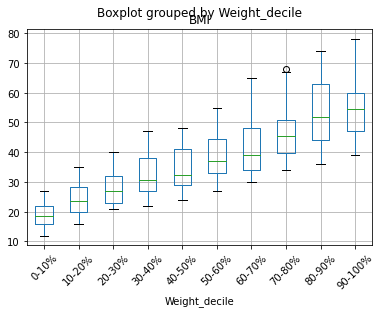

In [89]:
peso_alt['Weight_decile'] = pd.qcut(peso_alt['Weight'], 10, labels=['0-10%', '10-20%','20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])
peso_alt.boxplot(column='BMI', by='Weight_decile')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0-10%'),
  Text(1, 0, '10-20%'),
  Text(2, 0, '20-30%'),
  Text(3, 0, '30-40%'),
  Text(4, 0, '40-50%'),
  Text(5, 0, '50-60%'),
  Text(6, 0, '60-70%'),
  Text(7, 0, '70-80%'),
  Text(8, 0, '80-90%'),
  Text(9, 0, '90-100%')])

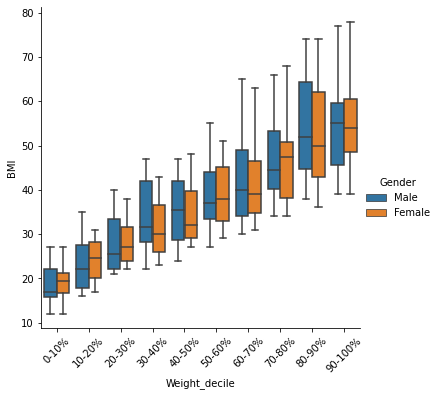

In [11]:
peso_alt['Weight_decile'] = pd.qcut(peso_alt['Weight'], 10, labels=['0-10%', '10-20%','20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])
#sns.boxplot(x="Weight_decile", y="BMI", hue="Gender", data=peso_alt)
#sns.catplot(x="Weight_decile", y="BMI", hue="Gender", data=peso_alt)
#sns.catplot(x="Weight_decile", y="BMI", hue="Gender", data=peso_alt, kind="violin")
sns.catplot(x="Weight_decile", y="BMI", hue="Gender", data=peso_alt, kind="box")
#sns.catplot(x="Weight_decile", y="BMI", hue="Gender", data=peso_alt, kind="box", col="Gender")
#sns.catplot(x="Weight_decile", y="BMI", hue="Gender", data=peso_alt, kind="point")
plt.xticks(rotation=45)